In [ ]:
from pdf2image import convert_from_path
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

def convert_pdf_and_crop(pdf_path, save_dir, res=400, crop_box=None):
    pages = convert_from_path(pdf_path, res)

    name_with_extension = os.path.basename(pdf_path)
    name = os.path.splitext(name_with_extension)[0]

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for idx, page in enumerate(pages):
        page_path = os.path.join(save_dir, f"{name}_{idx}.png")
        page.save(page_path, "PNG")

        if crop_box:
            img = Image.open(page_path)
            cropped_img = img.crop(crop_box)
            cropped_img_path = os.path.join(crop_dir, f"{name}_{idx}_cropped.png")
            cropped_img.save(cropped_img_path, "PNG")
            cropped_img.close()


pdf_path = "/Users/chae/Desktop/Finalproj/Geoga.pdf"
save_dir = "/Users/chae/Desktop/Finalproj/image/"
crop_dir = "/Users/chae/Desktop/Finalproj/cropped/"
crop_box = (250, 350, 3450, 4200)


convert_pdf_and_crop(pdf_path, save_dir, crop_box=crop_box)


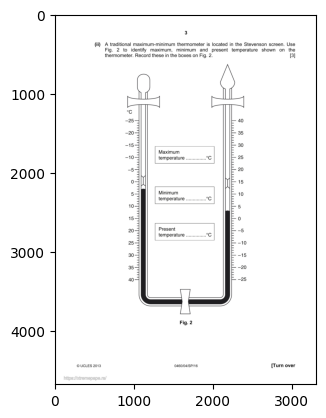

In [63]:
img = cv2.imread("/Users/chae/Desktop/Finalproj/image/Geoga_2.png")
plt.imshow(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

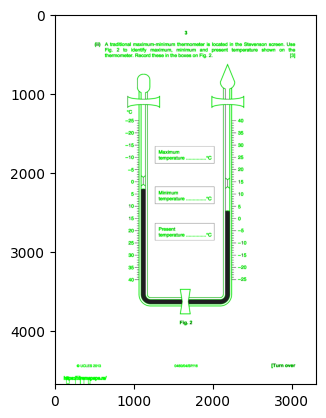

In [69]:
lower = np.array([60,60,60])
higher = np.array([250,250,250])
mask = cv2.inRange(img,lower,higher)
mask.shape
cont,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cont_img = cv2.drawContours(img, cont, -1, (0, 255, 0), 3)
plt.imshow(cont_img)
c = max(cont,key = cv2.contourArea)
x,y,h,w=cv2.boundingRect(c)
cv2.rectangle(cont_img,(x,y),(x+w,y+h),(0,255,0),5)
# plt.imshow(cont_img)

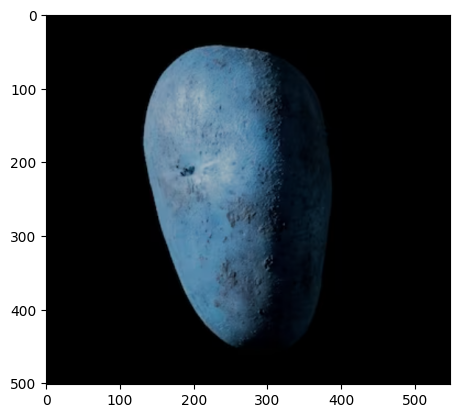

In [71]:
ptt = cv2.imread("/Users/chae/Desktop/Finalproj/ptt.png")
plt.imshow(ptt)

In [ ]:
cv2.waitKey(0)

gray = cv2.cvtColor(ptt, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(ptt, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', ptt) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 